# Data Cleaning

In [669]:
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [670]:
dt = pd.read_csv('shelter-animal-outcomes/train.csv')

In [671]:
dt.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [672]:
dt.shape

(26729, 10)

In [673]:
dt.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

In [674]:
## General viwe over data

In [675]:
dt.isna().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

Explore columns

In [676]:
"""
Outcome Type is the column we want to predict based on the other features
"""

'\nOutcome Type is the column we want to predict based on the other features\n'

In [677]:
"""
As an overview the columns/ features that might have impact on the outcome and the ones I'm going to focus are:
Animal Type, Breed and Color, SexUponOutcome, AgeUponOutcome
"""

"\nAs an overview the columns/ features that might have impact on the outcome and the ones I'm going to focus are:\nAnimal Type, Breed and Color, SexUponOutcome, AgeUponOutcome\n"

# OUTCOME -- what is going to be predicted -- Supervised Learning

In [678]:

dt['OutcomeType'].isna().sum()

0

In [679]:
dt['OutcomeType'].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

(array([10769.,     0.,   197.,     0.,     0.,  1555.,     0.,  4786.,
            0.,  9422.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

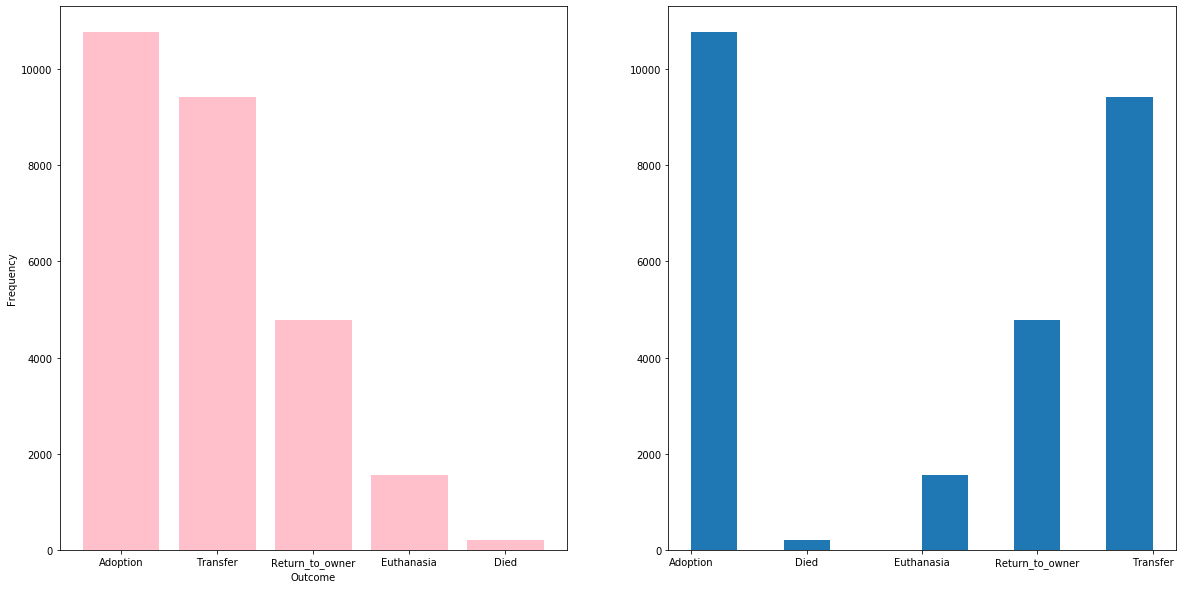

In [680]:
## Ploting Outcome

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].bar(dt['OutcomeType'].value_counts().keys(), dt['OutcomeType'].value_counts() , color = 'pink')
axs[0].set_xlabel('Outcome')
axs[0].set_ylabel('Frequency')
axs[1].hist(dt['OutcomeType'].sort_values())




# Animal ID Will become the index

In [681]:
#Make animal id the index 

dt.set_index('AnimalID', inplace = True)

In [682]:
dt

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...,...
A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan


# Inspect Feature OutcomeSubtype 

In [683]:
dt.OutcomeSubtype.value_counts()

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

In [684]:
out_sub = dt.OutcomeSubtype.isna().sum()

In [685]:
out_sub/dt.shape[0]

0.5092596056717423

In [686]:
"""
More that 50% of the data is missing regarding the subtype of the outcome.

I will drop this column!!!!

"""

'\nMore that 50% of the data is missing regarding the subtype of the outcome.\n\nI will drop this column!!!!\n\n'

In [687]:
## Drop outcomeSubtype
dt.drop(columns = 'OutcomeSubtype', inplace = True)

In [688]:
dt

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
A683430,NaN,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
A667013,NaN,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...
A702446,NaN,2015-05-14 11:56:00,Transfer,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
A718934,NaN,2016-01-20 18:59:00,Transfer,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
A698128,Zeus,2015-03-09 13:33:00,Adoption,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan


# Inspect Feature AnimalType 

In [689]:
dt.AnimalType.value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

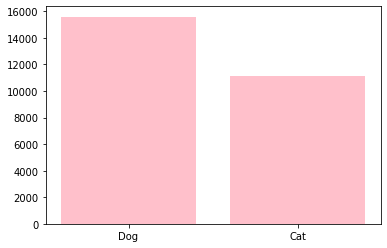

In [731]:
plt.bar(dt['AnimalType'].value_counts().keys(), dt['AnimalType'].value_counts() , color = 'pink')

plt.show()

# Inspect Feature Breed -- IMPORTANT FEATURE -- handle with care 

In [691]:
dt.Breed.value_counts()

Domestic Shorthair Mix                        8810
Pit Bull Mix                                  1906
Chihuahua Shorthair Mix                       1766
Labrador Retriever Mix                        1363
Domestic Medium Hair Mix                       839
                                              ... 
Boston Terrier/Beagle                            1
Rat Terrier/Jack Russell Terrier                 1
Boxer/Boston Terrier                             1
English Pointer                                  1
Parson Russell Terrier/Chihuahua Shorthair       1
Name: Breed, Length: 1380, dtype: int64

In [692]:
## Animals Breed that only appears 1 time  --- see if I should use?
#0r
## Animals Breed that only appears less than 30 times  --- see if I should use?





In [693]:
dt.Breed.value_counts() == 1  ## want to know what the unique here 

Domestic Shorthair Mix                        False
Pit Bull Mix                                  False
Chihuahua Shorthair Mix                       False
Labrador Retriever Mix                        False
Domestic Medium Hair Mix                      False
                                              ...  
Boston Terrier/Beagle                          True
Rat Terrier/Jack Russell Terrier               True
Boxer/Boston Terrier                           True
English Pointer                                True
Parson Russell Terrier/Chihuahua Shorthair     True
Name: Breed, Length: 1380, dtype: bool

In [694]:

low_breed = dt['Breed'].value_counts()[dt['Breed'].value_counts() == 1]


#low_breed = dt['Breed'].value_counts()[dt['Breed'].value_counts() < 30]




In [695]:
### The percentage of animals which theire breed is unique

len(low_breed)/dt.shape[0]

0.025403120206517266

In [696]:
dt.Breed.value_counts().shape

(1380,)

In [697]:
low_breed.index


Index(['Bulldog', 'Border Terrier/Miniature Poodle',
       'Dachshund Wirehair/Miniature Schnauzer', 'American Foxhound',
       'Whippet/Whippet', 'Dachshund Wirehair/Rat Terrier',
       'Great Dane/German Shepherd', 'Irish Terrier/Labrador Retriever',
       'Pembroke Welsh Corgi/Australian Shepherd',
       'Chow Chow/Cardigan Welsh Corgi',
       ...
       'Pomeranian/Border Terrier', 'Miniature Poodle/English Cocker Spaniel',
       'Miniature Schnauzer/Shih Tzu', 'Collie Rough/Chinese Sharpei',
       'Cardigan Welsh Corgi/Cairn Terrier', 'Boston Terrier/Beagle',
       'Rat Terrier/Jack Russell Terrier', 'Boxer/Boston Terrier',
       'English Pointer', 'Parson Russell Terrier/Chihuahua Shorthair'],
      dtype='object', length=679)

In [698]:
# decide wether to use this or not -- Filter

dt.loc[dt['Breed'].isin(low_breed.index)]

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,
A715261,Darcy,2015-11-15 14:06:00,Adoption,Dog,Spayed Female,9 years,Beagle/Treeing Walker Coonhound,White/Brown
A677577,Roxie,2014-05-01 16:12:00,Adoption,Dog,Spayed Female,10 months,Queensland Heeler/Shetland Sheepdog,Red Tick/Black
A701029,Bode,2015-05-01 11:04:00,Return_to_owner,Dog,Neutered Male,2 years,Chesa Bay Retr,Brown
A668122,NaN,2013-12-01 17:58:00,Adoption,Dog,Spayed Female,7 years,English Pointer,Liver/White
A672467,Apollo,2014-02-14 18:59:00,Adoption,Dog,Neutered Male,9 months,Cardigan Welsh Corgi/Cardigan Welsh Corgi,Fawn/White
...,...,...,...,...,...,...,...,...
A678850,Daphne,2014-05-19 19:20:00,Adoption,Dog,Spayed Female,5 months,Boxer/Neapolitan Mastiff,Tan/White
A696051,Grizzly,2015-02-02 12:07:00,Adoption,Dog,Neutered Male,3 years,French Bulldog/English Bulldog,Tan/White
A670660,Hank,2014-07-18 11:39:00,Adoption,Dog,Neutered Male,3 years,Vizsla/Boxer,Brown


In [699]:
"""
Problably will do an hot encoding of this one 

"""

'\nProblably will do an hot encoding of this one \n\n'

# Inspect Feature DATETIME -- use in analysis. not in prediction (probably)

In [700]:
# Convert DateTime column object to dattime format

dt['DateTime'] = pd.to_datetime(dt['DateTime'])


In [701]:
## discover the time-range: 

dt['DateTime'].min(), dt['DateTime'].max()

(Timestamp('2013-10-01 09:31:00'), Timestamp('2016-02-21 19:17:00'))

In [702]:
""" 

The time goes from 1 of October of 2013 to 21st of february of 2016.
So we are missing 9 months in 2013 and 9 months on 2016.

"""

' \n\nThe time goes from 1 of October of 2013 to 21st of february of 2016.\nSo we are missing 9 months in 2013 and 9 months on 2016.\n\n'

In [703]:
dt['month'] = dt['DateTime'].dt.month
dt['year'] = dt['DateTime'].dt.year


In [704]:
## Group table by year 

adopt = dt.loc[dt['OutcomeType']== 'Adoption']

adopt = adopt[['DateTime','OutcomeType']]

piv = adopt.pivot_table(values = ['OutcomeType'], index = adopt['DateTime'].dt.year , aggfunc = ({'OutcomeType':'count'}))
piv

,OutcomeType
DateTime,
2013,1128
2014,4358
2015,4620
2016,663


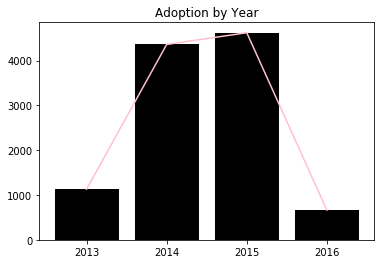

In [705]:
# Plot adoption by year 

plt.bar(piv.index, piv['OutcomeType'], color = 'black')
plt.plot(piv.index, piv['OutcomeType'], color = 'pink')
plt.xticks(list(piv.index))
plt.title('Adoption by Year')
plt.show()

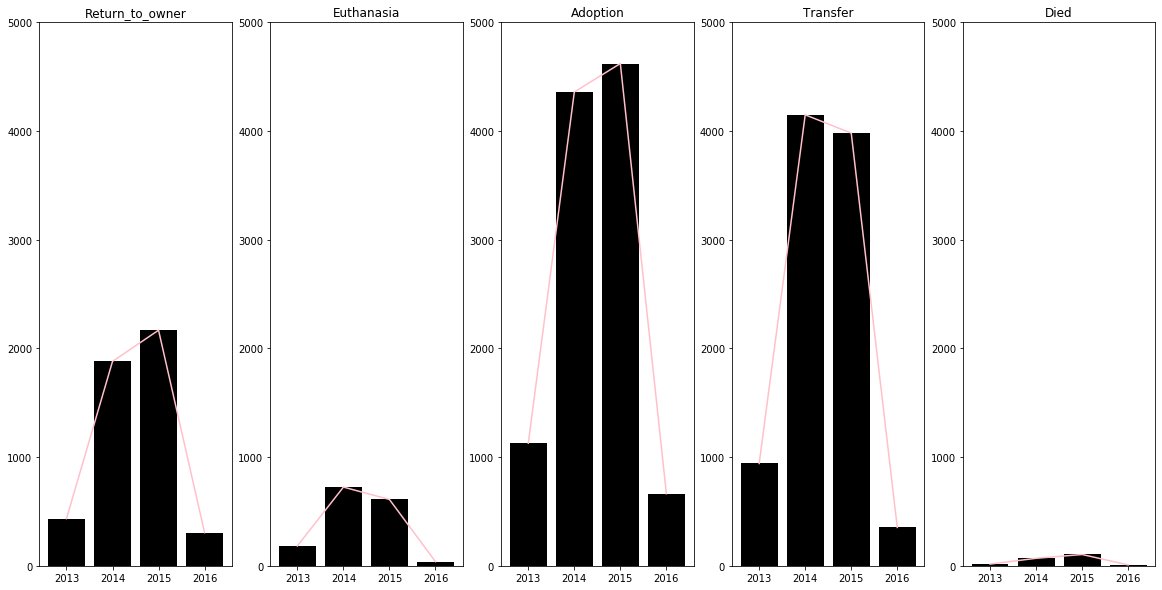

In [706]:
## do Plotting for outcome at once 


fig, axs = plt.subplots(1, 5, figsize=(20, 10))

#custom_xlim = (0, 100)
custom_ylim = (0, 5000)


# set the same scale for all the plots 

plt.setp(axs, ylim=custom_ylim)


for i, out in enumerate(dt['OutcomeType'].unique()):
    outcome = dt[['DateTime','OutcomeType']]
    outcome = outcome.loc[outcome['OutcomeType']== out]
    piv = outcome.pivot_table(values = ['OutcomeType'], index = outcome['DateTime'].dt.year , aggfunc = ({'OutcomeType':'count'}))

    axs[i].bar(piv.index, piv['OutcomeType'], color = 'black')
    axs[i].plot(piv.index, piv['OutcomeType'], color = 'pink')
    axs[i].title.set_text(out)


# Inspect feature SexuponOutcome

In [707]:
dt.loc[dt['SexuponOutcome'].isna()]

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,month,year
AnimalID,,,,,,,,,,
A667395,Diego,2013-11-27 16:11:00,Return_to_owner,Dog,NaN,7 years,Dachshund,Brown Merle,11,2013


In [708]:
dt.drop(index = 'A667395', inplace = True)

In [709]:
"""

Drop the row that has no SexuponOutcome.

"""

'\n\nDrop the row that has no SexuponOutcome.\n\n'

In [710]:
## Reset the index because I removed a row. ## Not needed anymore 

#dt = dt.reset_index(drop=True)


In [711]:
dt['SexuponOutcome'].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [712]:
#sex_list = list(dt['SexuponOutcome'].unique())

#for sex in sex_list:
    #austin_fixed[event] = austin_fixed['Events'].str.contains(event).astype(int)

In [713]:
# Creat a Gener Column based on Sex Upon Outcome
dt['Genere'] = ['Male' if 'Male' in gen else 'Female' if 'Female' in gen else 'Unknown' for gen in dt['SexuponOutcome']]

# Create a Steril or Normal Column based on Sex Upon Outcome

dt['Spayed/Neutered'] = [1 if 'Spayed' in gen else 1 if 'Neutered' in gen else 0 for gen in dt['SexuponOutcome']]



In [714]:
dt.head()

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,month,year,Genere,Spayed/Neutered
AnimalID,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,2,2014,Male,1
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,10,2013,Female,1
A686464,Pearce,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,2015,Male,1
A683430,NaN,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,7,2014,Male,0
A667013,NaN,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,11,2013,Male,1


# Inspect feature AgeuponOutcome

In [715]:
dt['AgeuponOutcome'].isna().sum()

18

In [716]:
dt.loc[dt['AgeuponOutcome'].isna()]

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,month,year,Genere,Spayed/Neutered
AnimalID,,,,,,,,,,,,
A720674,NaN,2016-02-16 10:17:00,Transfer,Cat,Intact Male,NaN,Domestic Shorthair Mix,Blue Tabby/White,2,2016,Male,0
A720973,NaN,2016-02-18 19:07:00,Transfer,Cat,Unknown,NaN,Domestic Shorthair Mix,Gray Tabby,2,2016,Unknown,0
A720820,NaN,2016-02-16 18:55:00,Transfer,Cat,Intact Female,NaN,Domestic Shorthair Mix,Brown Tabby,2,2016,Female,0
A721076,NaN,2016-02-20 16:37:00,Euthanasia,Dog,Intact Male,NaN,Toy Poodle Mix,White,2,2016,Male,0
A720422,NaN,2016-02-09 19:43:00,Transfer,Cat,Intact Female,NaN,Domestic Shorthair Mix,Brown Tabby,2,2016,Female,0
A720697,NaN,2016-02-16 10:17:00,Transfer,Cat,Spayed Female,NaN,Domestic Shorthair Mix,Black,2,2016,Female,1
A720640,NaN,2016-02-16 10:17:00,Transfer,Cat,Unknown,NaN,Domestic Shorthair Mix,Black Tabby/White,2,2016,Unknown,0
A720636,NaN,2016-02-16 10:17:00,Transfer,Cat,Unknown,NaN,Domestic Shorthair Mix,Black,2,2016,Unknown,0
A720701,NaN,2016-02-16 10:16:00,Transfer,Cat,Intact Male,NaN,Domestic Shorthair Mix,Blue Tabby/White,2,2016,Male,0


In [717]:
## Drop the 18 rows that have NaN in AgeuponOutcome

dt.drop(index = dt.loc[dt['AgeuponOutcome'].isna()].index , inplace = True)

In [718]:
# Reset the index again ## NOT NEEDED ANYMORE 

#dt.reset_index(drop = True)

In [719]:
## Convert age upon outcome into the same unity  : decided it to be month 

dt['AgeuponOutcome'].unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       '17 years', '18 years', '19 years', '20 years'], dtype=object)

In [720]:
## FUNCTION 1#

def convert_to_month(s):
    """
    Convert a string value to numeric. Also make the unity of the string as months.
    
    Args:
        s: The AgeuponOutcome in string format.

    Returns:
        The correct value in Months.
    """
    
    if 'year' in s or 'years' in s:
        
        return float(re.sub('\D+', '', s))* 12
    
    elif 'month' in s or 'months' in s:
        
        return float(re.sub('\D+', '', s))
    
    elif 'week' in s or 'weeks' in s:
        
        return float(re.sub('\D+', '', s)) * 0.23
    else:
        
        return float(re.sub('\D+', '', s)) * 0.03

In [721]:
dt['AgeuponOutcome'] = dt['AgeuponOutcome'].apply(convert_to_month)

In [722]:
dt.rename(columns = {'AgeuponOutcome': 'OutcomeAgeInMonths'}, inplace = True)

In [723]:
dt.head()

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,OutcomeAgeInMonths,Breed,Color,month,year,Genere,Spayed/Neutered
AnimalID,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,12.00,Shetland Sheepdog Mix,Brown/White,2,2014,Male,1
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,12.00,Domestic Shorthair Mix,Cream Tabby,10,2013,Female,1
A686464,Pearce,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,24.00,Pit Bull Mix,Blue/White,1,2015,Male,1
A683430,NaN,2014-07-11 19:09:00,Transfer,Cat,Intact Male,0.69,Domestic Shorthair Mix,Blue Cream,7,2014,Male,0
A667013,NaN,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,24.00,Lhasa Apso/Miniature Poodle,Tan,11,2013,Male,1


# Animal Name column --- after anlayzis drop it


In [724]:
a_name = pd.DataFrame(dt['Name'].value_counts())
a_name.rename(columns = {'Name': 'Frequency'}, inplace = True)

a_name.loc[a_name['Frequency'] > 50]

a_name.head(10)



,Frequency
Max,136
Bella,135
Charlie,107
Daisy,106
Lucy,94
Buddy,87
Princess,86
Rocky,85
Luna,68
Jack,66


In [725]:
a_name.head(10).index

Index(['Max', 'Bella', 'Charlie', 'Daisy', 'Lucy', 'Buddy', 'Princess',
       'Rocky', 'Luna', 'Jack'],
      dtype='object')

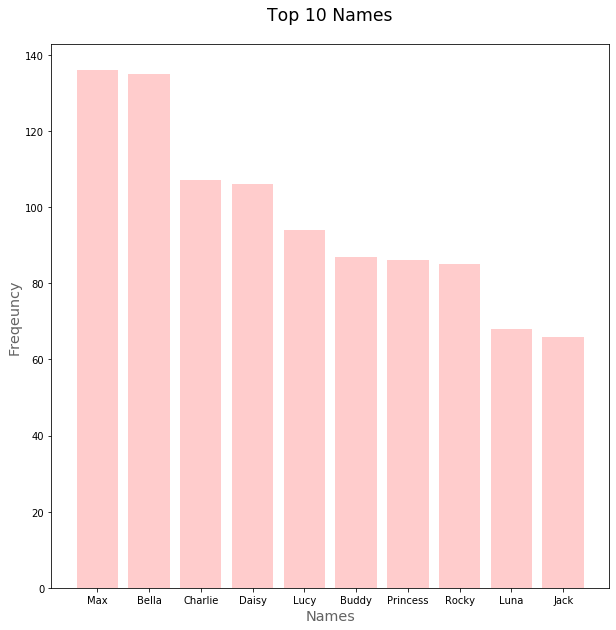

In [726]:
plt.figure(figsize = (10,10))

plt.bar(x = a_name.head(10).index, height = a_name.head(10)['Frequency'], color = '#ffcccc')

plt.ylabel('Freqeuncy', fontsize = 'x-large', alpha = 100)
plt.xlabel('Names', fontsize = 'x-large', alpha = 100) # alpha is transparency 
plt.title('Top 10 Names', fontsize = 'xx-large', position = (0.5,1.033))
plt.show()

In [727]:
"""
The most frequent names are the ones displayed on the graph above
"""


'\nThe most frequent names are the ones displayed on the graph above\n'

In [728]:
# Drop the Name column

dt.drop(columns = 'Name', inplace = True)

In [729]:
"""
Not gonna be relevant in the prediction

"""

'\nNot gonna be relevant in the prediction\n\n'

In [730]:
dt.dtypes

DateTime              datetime64[ns]
OutcomeType                   object
AnimalType                    object
SexuponOutcome                object
OutcomeAgeInMonths           float64
Breed                         object
Color                         object
month                          int64
year                           int64
Genere                        object
Spayed/Neutered                int64
dtype: object

# Color feature 